# The objective of this project is to leverage customer financial and behavioral data to predict a customer’s Credit_Mix category using machine learning techniques. By developing and evaluating multiple classification models, the project aims to identify patterns that influence credit health and provide actionable insights to support informed credit decision-making, risk assessment, and long-term financial well-being.

In [708]:
#Importing the required libraries for the project.
import pandas as pd
pd.set_option('display.max_columns', None) #To see all columns in the data set
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.express as px 
import string 

from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold, cross_validate, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, RocCurveDisplay, classification_report, precision_score, recall_score, f1_score
from sklearn.utils.class_weight import compute_class_weight
from sklearn.inspection import permutation_importance

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Loading the dataset from GitHub to ensure reproducibility and easy access to the data source.
url = 'https://raw.githubusercontent.com/toahirhussain/Predicting-Customer-Credit-Mix/refs/heads/main/Bank%20Data.csv'
df = pd.read_csv(url)
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,9,13.27,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,4,12.27,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",4,5,11.27,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,3,1,5.42,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923


In [542]:
df.tail()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
49995,0x25fe5,CUS_0x8600,December,Sarah McBridec,4975,031-35-0942,Architect,20002.88,1929.906667,10,8,29,5,"Personal Loan, Auto Loan, Mortgage Loan, Stude...",33,25,18.31,12.0,_,3571.7,34.780553,NaN,Yes,60.964772,146.48632477751087,Low_spent_Small_value_payments,275.53956951573343
49996,0x25fee,CUS_0x942c,September,Nicks,25,078-73-5990,Mechanic,39628.99,NaN,4,6,7,2_,"Auto Loan, and Student Loan",20,NaN,11.5,7.0,Good,502.38,27.758522,31 Years and 11 Months,NM,35.104023,181.44299902757518,Low_spent_Small_value_payments,409.39456169535066
49997,0x25fef,CUS_0x942c,October,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",23,5,13.5,7.0,Good,502.38,36.858542,32 Years and 0 Months,No,35.104023,__10000__,Low_spent_Large_value_payments,349.7263321025098
49998,0x25ff0,CUS_0x942c,November,Nicks,25,078-73-5990,Mechanic,39628.99,NaN,4,6,7,2_,"Auto Loan, and Student Loan",21,6_,11.5,7.0,Good,502.38,39.139840,32 Years and 1 Months,No,35.104023,97.59857973344877,High_spent_Small_value_payments,463.23898098947717
49999,0x25ff1,CUS_0x942c,December,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",22,5,11.5,7.0,_,502.38,34.108530,32 Years and 2 Months,No,35.104023,220.45787812168732,Low_spent_Medium_value_payments,360.37968260123847


Preserving the original dataset in its raw form while creating a duplicate dataset for preprocessing and modeling to ensure data integrity.

In [ ]:
#Preserving the original dataset in its raw form while creating a duplicate dataset for preprocessing and modeling to ensure data integrity.
wdf = df.copy()

In [546]:
wdf.shape

(50000, 27)

In [547]:
wdf.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,9,13.27,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,4,12.27,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",4,5,11.27,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,3,1,5.42,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923


In [548]:
wdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        50000 non-null  object 
 1   Customer_ID               50000 non-null  object 
 2   Month                     50000 non-null  object 
 3   Name                      44985 non-null  object 
 4   Age                       50000 non-null  object 
 5   SSN                       50000 non-null  object 
 6   Occupation                50000 non-null  object 
 7   Annual_Income             50000 non-null  object 
 8   Monthly_Inhand_Salary     42502 non-null  float64
 9   Num_Bank_Accounts         50000 non-null  int64  
 10  Num_Credit_Card           50000 non-null  int64  
 11  Interest_Rate             50000 non-null  int64  
 12  Num_of_Loan               50000 non-null  object 
 13  Type_of_Loan              44296 non-null  object 
 14  Delay_

In [549]:
wdf.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,42502.000000,50000.000000,50000.000000,50000.000000,50000.000000,48965.000000,50000.000000,50000.000000
mean,4182.004291,16.838260,22.921480,68.772640,21.052640,30.080200,32.279581,1491.304305
std,3174.109304,116.396848,129.314804,451.602363,14.860397,196.984121,5.106238,8595.647887
min,303.645417,-1.000000,0.000000,1.000000,-5.000000,0.000000,20.509652,0.000000
25%,1625.188333,3.000000,4.000000,8.000000,10.000000,4.000000,28.061040,32.222388
50%,3086.305000,6.000000,5.000000,13.000000,18.000000,7.000000,32.280390,74.733349
75%,5934.189094,7.000000,7.000000,20.000000,28.000000,10.000000,36.468591,176.157491
max,15204.633333,1798.000000,1499.000000,5799.000000,67.000000,2593.000000,48.540663,82398.000000


In [550]:
#Dropping Unnecessary column that have no impact to predict the model.
cols_to_drop = ['ID', 'Customer_ID', 'Name', 'SSN', 'Type_of_Loan']
wdf.drop(columns=cols_to_drop, inplace=True)

In [552]:
wdf['Age'] = wdf['Age'].str.strip(" -_")

In [553]:
wdf.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,September,23,Scientist,19114.12,1824.843333,3,4,3,4,3,7,11.27,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,October,24,Scientist,19114.12,1824.843333,3,4,3,4,3,9,13.27,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,November,24,Scientist,19114.12,1824.843333,3,4,3,4,-1,4,12.27,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,December,24,Scientist,19114.12,NaN,3,4,3,4,4,5,11.27,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,September,28,_______,34847.84,3037.986667,2,4,6,1,3,1,5.42,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923


In [554]:
#Converting credit history age to tatal months.
def convert_history_age(x):
    if pd.isnull(x):
        return np.nan
    parts = x.split()
    years = int(parts[0])
    months = int(parts[3])
    return (years * 12) + months

wdf['Credit_History_Age'] = wdf['Credit_History_Age'].apply(convert_history_age)

wdf['Credit_History_Age'].head()

0    273.0
1    274.0
2      NaN
3    276.0
4    327.0
Name: Credit_History_Age, dtype: float64

In [555]:
int_cols = ['Age', 'Num_Bank_Accounts', 'Num_Credit_Card',
            'Num_of_Loan', 'Delay_from_due_date',
            'Num_of_Delayed_Payment', 'Num_Credit_Inquiries']

float_cols = [
    'Annual_Income', 'Monthly_Inhand_Salary', 'Interest_Rate',
    'Changed_Credit_Limit', 'Outstanding_Debt',
    'Credit_Utilization_Ratio', 'Total_EMI_per_month',
    'Amount_invested_monthly', 'Monthly_Balance'
]

# convert integers
for col in int_cols:
    wdf[col] = pd.to_numeric(wdf[col], errors='coerce').astype('Int64')

# convert floats
for col in float_cols:
    wdf[col] = pd.to_numeric(wdf[col], errors='coerce')

In [559]:
#selecting all numeric column
num_cols = [
    'Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
    'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
    'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries',
    'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age',
    'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance'
]

In [560]:
wdf[num_cols].dtypes

Age                           Int64
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             Int64
Num_Credit_Card               Int64
Interest_Rate                 int64
Num_of_Loan                   Int64
Delay_from_due_date           Int64
Num_of_Delayed_Payment        Int64
Changed_Credit_Limit        float64
Num_Credit_Inquiries          Int64
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age          float64
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Monthly_Balance             float64
dtype: object

In [562]:
#Selecting all categorical columns
cat_cols = ['Month','Occupation', 'Payment_Behaviour', 'Payment_of_Min_Amount']

#making sure columns are string
wdf[cat_cols] = wdf[cat_cols].astype(str)

In [563]:
df[cat_cols].dtypes

Month                    object
Occupation               object
Payment_Behaviour        object
Payment_of_Min_Amount    object
dtype: object

In [564]:
for col in wdf.columns:
    if wdf[col].dtype == 'object':
        bad = wdf[col][wdf[col].str.contains(r'[^A-Za-z0-9\s@._-]', regex=True, na=False)]
        if not bad.empty:
            print(f"Column: {col}")
            print(bad.head())
            print("-" * 50)

Column: Payment_Behaviour
7      !@9#%8
36     !@9#%8
69     !@9#%8
84     !@9#%8
141    !@9#%8
Name: Payment_Behaviour, dtype: object
--------------------------------------------------


In [565]:
#Dropping invalid rows from Payment Behavious column.
wdf = wdf[wdf['Payment_Behaviour'] != '!@9#%8']

In [566]:
wdf.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,September,23,Scientist,19114.12,1824.843333,3,4,3,4,3,7,11.27,2022,Good,809.98,35.030402,273.0,No,49.574949,236.642682,Low_spent_Small_value_payments,186.266702
1,October,24,Scientist,19114.12,1824.843333,3,4,3,4,3,9,13.27,4,Good,809.98,33.053114,274.0,No,49.574949,21.465380,High_spent_Medium_value_payments,361.444004
2,November,24,Scientist,19114.12,1824.843333,3,4,3,4,-1,4,12.27,4,Good,809.98,33.811894,NaN,No,49.574949,148.233938,Low_spent_Medium_value_payments,264.675446
3,December,24,Scientist,19114.12,NaN,3,4,3,4,4,5,11.27,4,Good,809.98,32.430559,276.0,No,49.574949,39.082511,High_spent_Medium_value_payments,343.826873
4,September,28,_______,34847.84,3037.986667,2,4,6,1,3,1,5.42,5,Good,605.03,25.926822,327.0,No,18.816215,39.684018,High_spent_Large_value_payments,485.298434


In [567]:
#From the dataset overview, we can see there is a invalid accupation type in occupation column. Let's check if there are more invalid accoupation type.
invalid_values = wdf['Occupation'].unique()
print(invalid_values)

['Scientist' '_______' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer'
 'Lawyer' 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant'
 'Musician' 'Mechanic' 'Writer' 'Architect']


In [568]:
#we only get one invalid occupation type. let's handle it.
#making the invalid accoupation to null.
wdf['Occupation'] = wdf['Occupation'].replace("_______", np.nan)

#filling only this null value with mode
wdf['Occupation'] = wdf['Occupation'].fillna(wdf['Occupation'].mode()[0])

In [569]:
wdf.isnull().sum()

Month                          0
Age                            0
Occupation                     0
Annual_Income               3254
Monthly_Inhand_Salary       6949
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                 2252
Delay_from_due_date            0
Num_of_Delayed_Payment      4543
Changed_Credit_Limit         977
Num_Credit_Inquiries         953
Credit_Mix                     0
Outstanding_Debt             454
Credit_Utilization_Ratio       0
Credit_History_Age          4103
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly     4132
Payment_Behaviour              0
Monthly_Balance              528
dtype: int64

# Handaling null values

In [ ]:
##Missing values in Annual Income were imputed using the median salary of each occupation group 
#to preserve occupation-specific income patterns and reduce the influence of outliers.

wdf['Annual_Income'] = (
    wdf.groupby('Occupation')['Annual_Income']
       .transform(lambda x: x.fillna(x.median()))
)

#Missing values in Monthly_Inhand_Salary were imputed using the median salary of each occupation group 
#to preserve occupation-specific income patterns and reduce the influence of outliers.
wdf['Monthly_Inhand_Salary'] = (
    wdf.groupby('Occupation')['Monthly_Inhand_Salary']
       .transform(lambda x: x.fillna(x.median()))
)

# Num_of_Loan  → median after conversion
wdf['Num_of_Loan'] = wdf['Num_of_Loan'].fillna(
    wdf['Num_of_Loan'].median()
)

# Missing delayed payments → assume 0
wdf['Num_of_Delayed_Payment'] = wdf['Num_of_Delayed_Payment'].fillna(0)

wdf['Changed_Credit_Limit'] = wdf['Changed_Credit_Limit'].fillna(
    wdf['Changed_Credit_Limit'].median()
)

# Missing credit inquiries → assume 0
wdf['Num_Credit_Inquiries'] = wdf['Num_Credit_Inquiries'].fillna(0)

# Outstanding_Debt → median after conversion
wdf['Outstanding_Debt'] = wdf['Outstanding_Debt'].fillna(
    wdf['Outstanding_Debt'].median()
)

# Credit history → median after conversion
wdf['Credit_History_Age'] = wdf['Credit_History_Age'].fillna(
    wdf['Credit_History_Age'].median()
)

# Missing investment → assume 0
wdf['Amount_invested_monthly'] = wdf['Amount_invested_monthly'].fillna(0)

##Missing values in Monthly_Balance were imputed using the median salary of each occupation group 
#to preserve occupation-specific income patterns and reduce the influence of outliers.
wdf['Monthly_Balance'] = (
    wdf.groupby('Occupation')['Monthly_Balance']
       .transform(lambda x: x.fillna(x.median()))
)

In [572]:
wdf.head(7)

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,September,23,Scientist,19114.12,1824.843333,3,4,3,4,3,7,11.27,2022,Good,809.98,35.030402,273.0,No,49.574949,236.642682,Low_spent_Small_value_payments,186.266702
1,October,24,Scientist,19114.12,1824.843333,3,4,3,4,3,9,13.27,4,Good,809.98,33.053114,274.0,No,49.574949,21.465380,High_spent_Medium_value_payments,361.444004
2,November,24,Scientist,19114.12,1824.843333,3,4,3,4,-1,4,12.27,4,Good,809.98,33.811894,225.0,No,49.574949,148.233938,Low_spent_Medium_value_payments,264.675446
3,December,24,Scientist,19114.12,3260.465000,3,4,3,4,4,5,11.27,4,Good,809.98,32.430559,276.0,No,49.574949,39.082511,High_spent_Medium_value_payments,343.826873
4,September,28,Lawyer,34847.84,3037.986667,2,4,6,1,3,1,5.42,5,Good,605.03,25.926822,327.0,No,18.816215,39.684018,High_spent_Large_value_payments,485.298434
5,October,28,Teacher,34847.84,3037.986667,2,4,6,1,3,3,5.42,5,Good,605.03,30.116600,328.0,No,18.816215,251.627369,Low_spent_Large_value_payments,303.355083
6,November,28,Teacher,34847.84,3037.986667,2,4,6,1,3,0,5.42,5,_,605.03,30.996424,329.0,No,18.816215,72.680145,High_spent_Large_value_payments,452.302307


In [573]:
wdf.isnull().sum()

Month                       0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
dtype: int64

In [574]:
wdf["Credit_Mix"].unique()

array(['Good', '_', 'Standard', 'Bad'], dtype=object)

In [575]:
(wdf["Credit_Mix"] == "_").sum()

np.int64(9086)

In [576]:
#Dropping "_" values as it is a huge number and Credit Mix is our target variable.
wdf["Credit_Mix"] = wdf["Credit_Mix"].replace("_", np.nan)
wdf = wdf.dropna(subset=["Credit_Mix"])

In [577]:
wdf["Credit_Mix"].unique()

array(['Good', 'Standard', 'Bad'], dtype=object)

In [578]:
#Sanity check
print(len(wdf))
print(wdf["Credit_Mix"].value_counts())

37114
Credit_Mix
Standard    16970
Good        11290
Bad          8854
Name: count, dtype: int64


In [579]:
#Mapping target column
wdf["Credit_Mix"] = wdf["Credit_Mix"].map({
    "Bad": 0,
    "Standard": 1,
    "Good": 2
})

In [580]:
wdf["Credit_Mix"].isna().sum()      # should be 0
wdf["Credit_Mix"].unique()         # should be [0,1,2]
wdf["Credit_Mix"].value_counts()   # check class balance

Credit_Mix
1    16970
2    11290
0     8854
Name: count, dtype: int64

In [581]:
#Detecting ouliers and handle them
for col in num_cols:
    Q1 = wdf[col].quantile(0.25)
    Q3 = wdf[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Cap outliers
    wdf[col] = np.where(wdf[col] < lower, lower,
                        np.where(wdf[col] > upper, upper, wdf[col]))

In [583]:
wdf.head(10)

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,September,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,19.0,2,809.980,35.030402,273.0,No,49.574949,236.642682,Low_spent_Small_value_payments,186.266702
1,October,24.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,9.0,13.27,4.0,2,809.980,33.053114,274.0,No,49.574949,21.465380,High_spent_Medium_value_payments,361.444004
2,November,24.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,-1.0,4.0,12.27,4.0,2,809.980,33.811894,225.0,No,49.574949,148.233938,Low_spent_Medium_value_payments,264.675446
3,December,24.0,Scientist,19114.12,3260.465000,3.0,4.0,3.0,4.0,4.0,5.0,11.27,4.0,2,809.980,32.430559,276.0,No,49.574949,39.082511,High_spent_Medium_value_payments,343.826873
4,September,28.0,Lawyer,34847.84,3037.986667,2.0,4.0,6.0,1.0,3.0,1.0,5.42,5.0,2,605.030,25.926822,327.0,No,18.816215,39.684018,High_spent_Large_value_payments,485.298434
5,October,28.0,Teacher,34847.84,3037.986667,2.0,4.0,6.0,1.0,3.0,3.0,5.42,5.0,2,605.030,30.116600,328.0,No,18.816215,251.627369,Low_spent_Large_value_payments,303.355083
8,September,35.0,Engineer,143162.64,3221.851667,1.0,5.0,8.0,3.0,8.0,34.5,7.10,3.0,2,1303.010,35.229707,221.0,No,246.992319,397.503654,Low_spent_Medium_value_payments,766.506473
9,October,35.0,Engineer,143162.64,10649.153333,1.0,5.0,8.0,3.0,6.0,3.0,2.10,3.0,2,1303.010,35.685836,222.0,No,246.992319,453.615131,Low_spent_Large_value_payments,766.506473
10,November,35.0,Engineer,143162.64,10649.153333,1.0,5.0,8.0,9.5,8.0,5.0,7.10,5.0,2,1165.735,31.819845,223.0,No,246.992319,466.185381,Low_spent_Medium_value_payments,410.497445
11,December,35.0,Engineer,143162.64,10649.153333,1.0,5.0,8.0,3.0,8.0,6.0,7.10,5.0,2,1303.010,33.707169,225.0,No,246.992319,466.185381,High_spent_Medium_value_payments,715.421901


In [584]:
#Encoding all the categorical columns.

one_hot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded = one_hot_encoder.fit_transform(wdf[cat_cols])

# Convert to DataFrame with proper column names
encoded_df = pd.DataFrame(encoded, columns=one_hot_encoder.get_feature_names_out(cat_cols),index=wdf.index)

# Replace original categorical columns
wdf = pd.concat([wdf.drop(columns=cat_cols), encoded_df], axis=1)

In [585]:
#scaling all numeric cloumn
scaler = StandardScaler()
wdf[num_cols] = scaler.fit_transform(wdf[num_cols])

In [588]:
wdf.isnull().sum()

Age                                                   0
Annual_Income                                         0
Monthly_Inhand_Salary                                 0
Num_Bank_Accounts                                     0
Num_Credit_Card                                       0
Interest_Rate                                         0
Num_of_Loan                                           0
Delay_from_due_date                                   0
Num_of_Delayed_Payment                                0
Changed_Credit_Limit                                  0
Num_Credit_Inquiries                                  0
Credit_Mix                                            0
Outstanding_Debt                                      0
Credit_Utilization_Ratio                              0
Credit_History_Age                                    0
Total_EMI_per_month                                   0
Amount_invested_monthly                               0
Monthly_Balance                                 

In [591]:
wdf.head(20)

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Month_December,Month_November,Month_October,Month_September,Occupation_Accountant,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments,Payment_of_Min_Amount_NM,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes
0,-0.973399,-0.843002,-0.775307,-0.921061,-0.749879,-1.295075,0.267998,-1.243495,-0.694932,0.140664,2.710716,2,-0.543005,0.537138,0.482463,-0.597002,0.568376,-1.158804,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,-0.891255,-0.843002,-0.775307,-0.921061,-0.749879,-1.295075,0.267998,-1.243495,-0.425368,0.441082,-0.777493,2,-0.543005,0.150223,0.492970,-0.597002,-1.002708,-0.153606,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.891255,-0.843002,-0.775307,-0.921061,-0.749879,-1.295075,0.267998,-1.521150,-1.099279,0.290873,-0.777493,2,-0.543005,0.298701,-0.021857,-0.597002,-0.077127,-0.708881,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,-0.891255,-0.843002,-0.250542,-0.921061,-0.749879,-1.295075,0.267998,-1.174081,-0.964497,0.140664,-0.777493,2,-0.543005,0.028402,0.513983,-0.597002,-0.874080,-0.254697,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.562680,-0.416203,-0.331865,-1.296265,-0.749879,-0.970834,-0.864752,-1.243495,-1.503626,-0.738059,-0.544945,2,-0.733824,-1.244248,1.049824,-0.860454,-0.869688,0.557092,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,-0.562680,-0.416203,-0.331865,-1.296265,-0.749879,-0.970834,-0.864752,-1.243495,-1.234061,-0.738059,-0.544945,2,-0.733824,-0.424393,1.060331,-0.860454,0.677785,-0.486931,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
8,0.012326,2.521989,-0.264656,-1.671469,-0.303049,-0.754674,-0.109585,-0.896425,3.011578,-0.485708,-1.010040,2,-0.083969,0.576138,-0.063884,1.093896,1.742879,2.170713,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
9,0.012326,2.521989,2.450261,-1.671469,-0.303049,-0.754674,-0.109585,-1.035253,-1.234061,-1.236754,-1.010040,2,-0.083969,0.665394,-0.053377,1.093896,2.152568,2.170713,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
10,0.012326,2.521989,2.450261,-1.671469,-0.303049,-0.754674,2.344707,-0.896425,-0.964497,-0.485708,-0.544945,2,-0.211779,-0.091103,-0.042871,1.093896,2.244348,0.127871,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
11,0.012326,2.521989,2.450261,-1.671469,-0.303049,-0.754674,-0.109585,-0.896425,-0.829715,-0.485708,-0.544945,2,-0.083969,0.278208,-0.021857,1.093896,2.244348,1.877581,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


The dataset has been thoroughly cleaned, and all necessary preprocessing steps have been completed to ensure data quality and consistency. With the data now properly prepared, it is ready to be split into training and testing sets for the next phase of model development and evaluation.

# Splitting Data into Train and Test

In [592]:
x = wdf.drop(columns=['Credit_Mix'])
y = wdf['Credit_Mix']

In [593]:
x.head()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Month_December,Month_November,Month_October,Month_September,Occupation_Accountant,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments,Payment_of_Min_Amount_NM,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes
0,-0.973399,-0.843002,-0.775307,-0.921061,-0.749879,-1.295075,0.267998,-1.243495,-0.694932,0.140664,2.710716,-0.543005,0.537138,0.482463,-0.597002,0.568376,-1.158804,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,-0.891255,-0.843002,-0.775307,-0.921061,-0.749879,-1.295075,0.267998,-1.243495,-0.425368,0.441082,-0.777493,-0.543005,0.150223,0.492970,-0.597002,-1.002708,-0.153606,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.891255,-0.843002,-0.775307,-0.921061,-0.749879,-1.295075,0.267998,-1.521150,-1.099279,0.290873,-0.777493,-0.543005,0.298701,-0.021857,-0.597002,-0.077127,-0.708881,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,-0.891255,-0.843002,-0.250542,-0.921061,-0.749879,-1.295075,0.267998,-1.174081,-0.964497,0.140664,-0.777493,-0.543005,0.028402,0.513983,-0.597002,-0.874080,-0.254697,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.562680,-0.416203,-0.331865,-1.296265,-0.749879,-0.970834,-0.864752,-1.243495,-1.503626,-0.738059,-0.544945,-0.733824,-1.244248,1.049824,-0.860454,-0.869688,0.557092,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [595]:
y.head()

0    2
1    2
2    2
3    2
4    2
Name: Credit_Mix, dtype: int64

In [596]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=10)

In [735]:
print("x shape:", x.shape)
print("y shape:", y.shape)

print("xtrain:", xtrain.shape, "ytrain:", ytrain.shape)
print("ytest :", xtest.shape,  "ytest :", ytest.shape)

x shape: (37114, 45)
y shape: (37114,)
xtrain: (25979, 45) ytrain: (25979,)
ytest : (11135, 45) ytest : (11135,)


In [625]:
#Creating a function to evaluate all the training models.
def evaluate_model(model, x, y, model_name):
    y_pred = model.predict(x)
    
    # probabilities needed for AUC
    y_proba = model.predict_proba(x)

    return {
        "Model": model_name,
        "Accuracy": accuracy_score(y, y_pred),
        "Precision": precision_score(y, y_pred, average="macro"),
        "Recall": recall_score(y, y_pred, average="macro"),
        "F1-score": f1_score(y, y_pred, average="macro"),
        "AUC-ROC": roc_auc_score(
            y,
            y_proba,
            multi_class="ovr",
            average="macro"
        )
    }


# Training Data with Logistic Regression

In [ ]:
lr_model = LogisticRegression()
lr_model.fit(xtrain, ytrain)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [627]:
lr_pred = lr_model.predict(xtest)

In [628]:
train_score = lr_model.score(xtrain, ytrain)
train_score

0.8908733977443319

In [629]:
test_score = lr_model.score(xtest, ytest)
test_score

0.8885496183206106

In [630]:
evaluate_model(lr_model, xtest, ytest, "Logistic regression")

{'Model': 'Logistic regression',
 'Accuracy': 0.8885496183206106,
 'Precision': 0.8893305474364158,
 'Recall': 0.8930414911376591,
 'F1-score': 0.891126639504944,
 'AUC-ROC': 0.9783235313248966}

In [631]:
print("Classification Report:")
print(classification_report(ytest, lr_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      2669
           1       0.89      0.87      0.88      5104
           2       0.89      0.90      0.90      3362

    accuracy                           0.89     11135
   macro avg       0.89      0.89      0.89     11135
weighted avg       0.89      0.89      0.89     11135



In [632]:
cm_lr = confusion_matrix(ytest, lr_pred)
cm_lr

array([[2417,  252,    0],
       [ 290, 4437,  377],
       [   0,  322, 3040]])

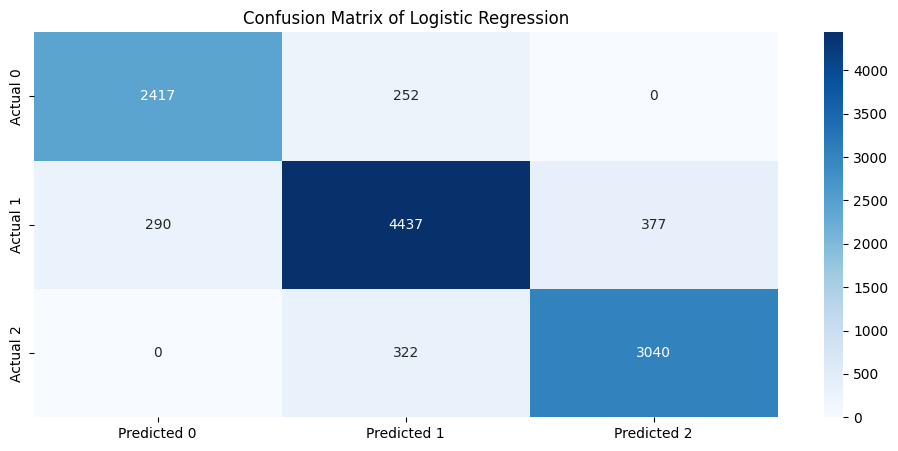

In [ ]:
#Visualizing a heatmap for the Logistic Regression.

plt.figure(figsize=(12,5))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap="Blues", 
            xticklabels= ["Predicted 0", "Predicted 1", "Predicted 2"],
            yticklabels= ["Actual 0", "Actual 1", "Actual 2"]
            
)
plt.title("Confusion Matrix of Logistic Regression")
plt.show()

# Training Data with Random Forest

In [634]:
rf_model = RandomForestClassifier(random_state=10)
rf_model.fit(xtrain, ytrain)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [635]:
rf_predict = rf_model.predict(xtest)

In [636]:
rf_training_score = rf_model.score(xtrain, ytrain)
rf_training_score

1.0

In [637]:
rf_text_score = rf_model.score(xtest, ytest)
rf_text_score

0.9580601706331388

In [638]:
evaluate_model(rf_model, xtest, ytest, "Random Forest Classifier")

{'Model': 'Random Forest Classifier',
 'Accuracy': 0.9580601706331388,
 'Precision': 0.9581064713406975,
 'Recall': 0.9603993189591545,
 'F1-score': 0.959215399407439,
 'AUC-ROC': 0.9963102112334007}

In [639]:
print('Classification Report of Random Forest Model')
print(classification_report(ytest, rf_predict))

Classification Report of Random Forest Model
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      2669
           1       0.96      0.95      0.95      5104
           2       0.96      0.96      0.96      3362

    accuracy                           0.96     11135
   macro avg       0.96      0.96      0.96     11135
weighted avg       0.96      0.96      0.96     11135



In [640]:
rf_cm = confusion_matrix(ytest, rf_predict)
rf_cm

array([[2602,   67,    0],
       [ 120, 4855,  129],
       [   0,  151, 3211]])

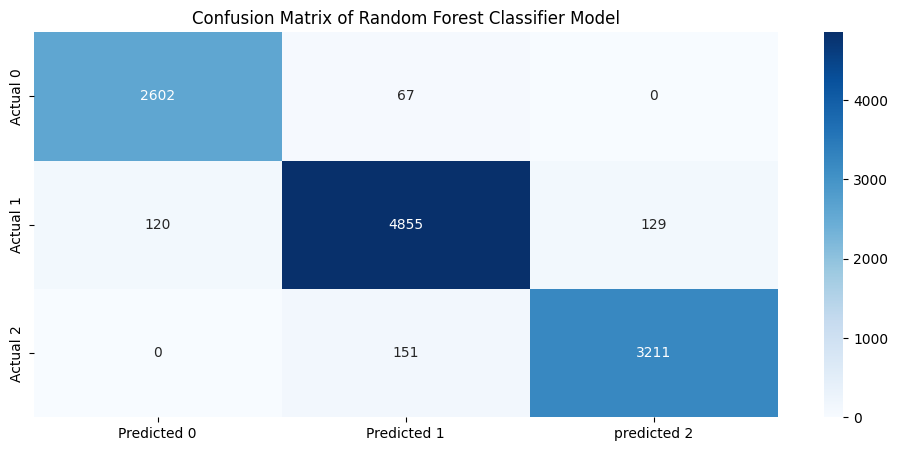

In [ ]:
#Visualizing a heatmap for the Random Forest Classifier.

plt.figure(figsize=(12,5))
sns.heatmap(rf_cm, annot=True, cmap="Blues", fmt='d',
            yticklabels=['Actual 0', 'Actual 1', 'Actual 2'],
            xticklabels=['Predicted 0', 'Predicted 1', 'predicted 2']
)
plt.title("Confusion Matrix of Random Forest Classifier Model")
plt.show()

# Traing data with XGBoost

In [642]:
xg_model = XGBClassifier()
xg_model.fit(xtrain, ytrain)

,objective,'multi:softprob'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [643]:
xg_pred = xg_model.predict(xtest)

In [644]:
xg_training_score  = xg_model.score(xtrain, ytrain)
xg_training_score

0.9976134570229801

In [645]:
xg_testing_score = xg_model.score(xtest, ytest)
xg_testing_score

0.9612932195779075

In [646]:
evaluate_model(xg_model, xtest, ytest, "XGBoost Classifier")

{'Model': 'XGBoost Classifier',
 'Accuracy': 0.9612932195779075,
 'Precision': 0.9621323708603212,
 'Recall': 0.9624400391688345,
 'F1-score': 0.9622841274271797,
 'AUC-ROC': 0.997355277263979}

In [647]:
print('Classification report of XG Boost Boost Classifier:')
print(classification_report(ytest, xg_pred))

Classification report of XG Boost Boost Classifier:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      2669
           1       0.96      0.96      0.96      5104
           2       0.96      0.96      0.96      3362

    accuracy                           0.96     11135
   macro avg       0.96      0.96      0.96     11135
weighted avg       0.96      0.96      0.96     11135



In [648]:
cm_xg = confusion_matrix(ytest, xg_pred)
cm_xg

array([[2586,   83,    0],
       [  94, 4888,  122],
       [   0,  132, 3230]])

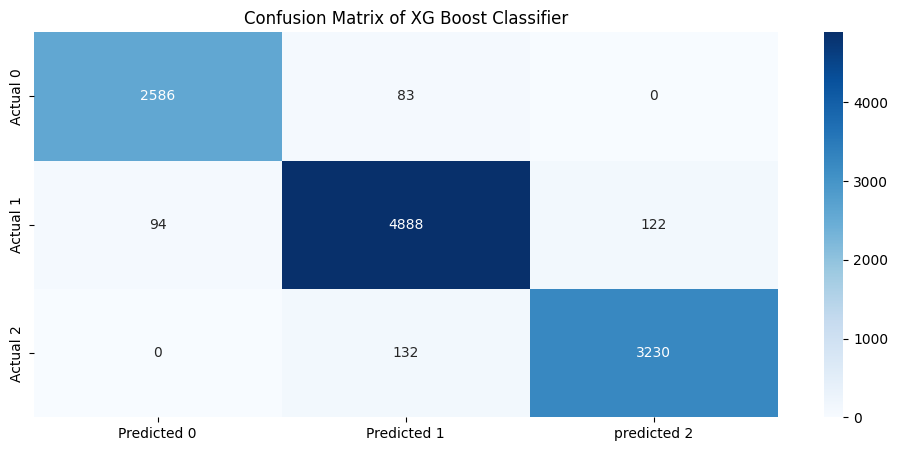

In [ ]:
#Visualizing a heatmap for the XG Boost Classifier.

plt.figure(figsize=(12,5))
sns.heatmap(cm_xg, annot=True, cmap="Blues", fmt='d',
            xticklabels=["Predicted 0", "Predicted 1", "predicted 2"],
            yticklabels=["Actual 0", "Actual 1", "Actual 2"]
)
plt.title("Confusion Matrix of XG Boost Classifier")
plt.show()

# Traning data with Gradient Boosting.

In [652]:
gb_model = GradientBoostingClassifier()
gb_model.fit(xtrain, ytrain)

,loss,'log_loss'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [654]:
gb_pred = gb_model.predict(xtest)

In [656]:
gb_training_score = gb_model.score(xtrain, ytrain)
gb_training_score

0.9460718272450825

In [660]:
gb_testing_score = gb_model.score(xtest, ytest)
gb_testing_score

0.9402784014369107

In [659]:
evaluate_model(gb_model, xtest, ytest, "Gradient Boosting Classifier")

{'Model': 'Gradient Boosting Classifier',
 'Accuracy': 0.9402784014369107,
 'Precision': 0.9425339506955752,
 'Recall': 0.9413701407528058,
 'F1-score': 0.941944425351351,
 'AUC-ROC': 0.9941291652929735}

In [662]:
cm_gb = confusion_matrix(ytest, gb_pred)
cm_gb

array([[2536,  133,    0],
       [ 127, 4787,  190],
       [   0,  215, 3147]])

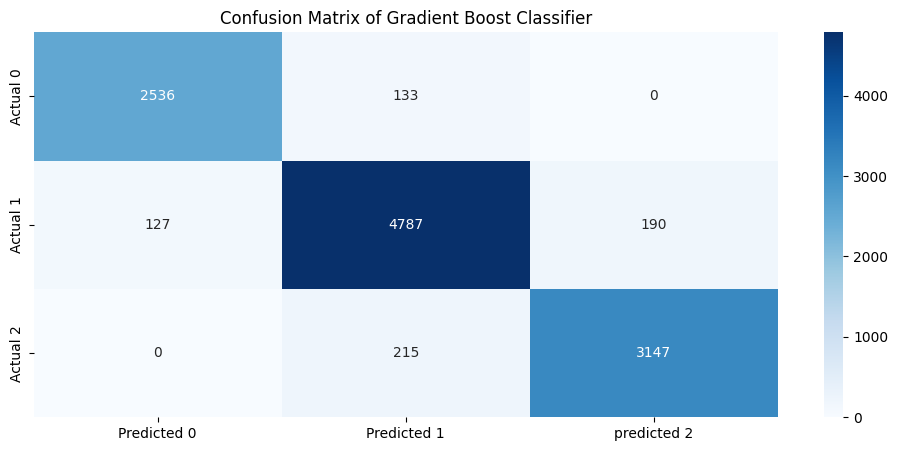

In [ ]:
#Visualizing a heatmap for the Gradient Boosting Classifier.

plt.figure(figsize=(12,5))
sns.heatmap(cm_gb, annot=True, cmap="Blues", fmt='d',
            xticklabels=["Predicted 0", "Predicted 1", "predicted 2"],
            yticklabels=["Actual 0", "Actual 1", "Actual 2"]
)
plt.title("Confusion Matrix of Gradient Boost Classifier")
plt.show()

## Model Evaluation

In [ ]:
#Evaluating models, and average performance metrics into a comparison DataFrame.
results = []

results.append(evaluate_model(lr_model, xtest, ytest, "Logistic Regression"))
results.append(evaluate_model(rf_model, xtest, ytest, "Random Forest"))
results.append(evaluate_model(xg_model, xtest, ytest, "XGBoost"))
results.append(evaluate_model(gb_model, xtest, ytest, "Gradient Boost Classifier"))

results_df = pd.DataFrame(results)
results_df


,Model,Accuracy,Precision,Recall,F1-score,AUC-ROC
0,Logistic Regression,0.888550,0.889331,0.893041,0.891127,0.978324
1,Random Forest,0.958060,0.958106,0.960399,0.959215,0.996310
2,XGBoost,0.961293,0.962132,0.962440,0.962284,0.997355
3,Gradient Boost Classifier,0.940278,0.942534,0.941370,0.941944,0.994129


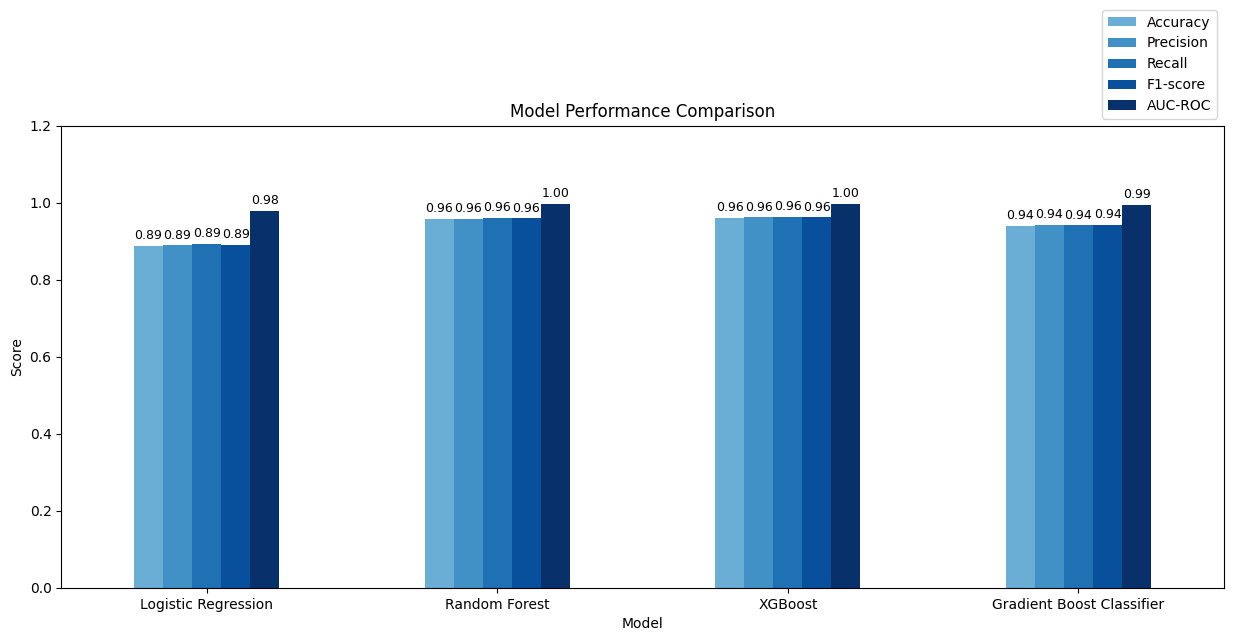

In [ ]:
#Plotting model accuracies to visually assess and compare the performance of all four models.

metrics = ["Accuracy", "Precision", "Recall", "F1-score", "AUC-ROC"]
colors = plt.cm.Blues(np.linspace(0.5, 1.0, len(metrics)))

results_df.set_index("Model")[metrics].plot(
    kind="bar",
    figsize=(15, 6),
    color=colors,
)
ax = plt.gca()

for bar in ax.patches:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height +0.01,
        f"{height:.2f}",
        ha="center",
        va="bottom",
        fontsize=9
    )

plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.ylim(0, 1.2)
plt.xticks(rotation=0)
plt.legend(loc="lower right", bbox_to_anchor=(1, 1))
plt.show()

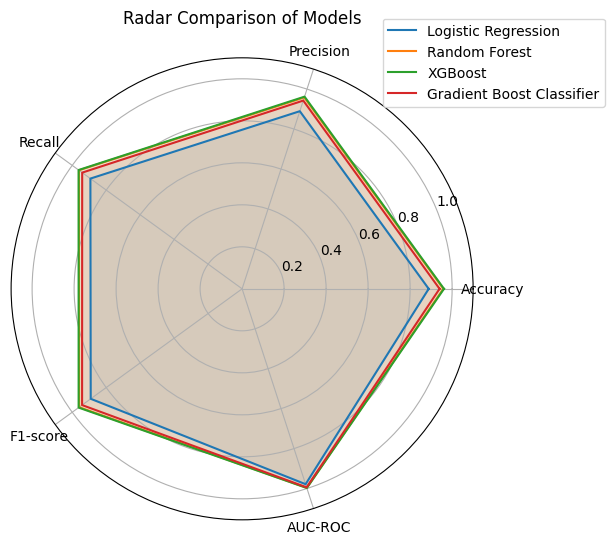

In [ ]:
#A radar chart to compare multiple performance metrics across models in a single, intuitive visualization.
labels = metrics
angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(12, 6), subplot_kw=dict(polar=True))

for _, row in results_df.iterrows():
    values = row[metrics].tolist()
    values += values[:1]
    ax.plot(angles, values, label=row["Model"])
    ax.fill(angles, values, alpha=0.1)

ax.set_thetagrids(np.degrees(angles[:-1]), labels)
ax.set_ylim(0, 1.1)
ax.set_title("Radar Comparison of Models", pad=25)
ax.legend(loc="upper right", bbox_to_anchor=(1.3, 1.1))

plt.show()


At this stage, hyperparameter tuning is being performed to optimize model performance and improve generalization. Appropriate search strategies are being applied based on model complexity, with exhaustive grid search being used for simpler models and randomized search being employed for more complex ensemble models. This approach is ensuring an efficient exploration of the hyperparameter space while balancing performance and computational cost.

# Hyperparameter Tuning for Logistic regression

In [ ]:
lr = LogisticRegression(
    max_iter=2000,
    multi_class="auto"
)

#Specifying all possible hyperparameter values.
param_grid_lr = {
    "C": [0.01, 0.1, 1, 10],
    "penalty": ["l2"],
    "solver": ["lbfgs"],
    "class_weight": [None, "balanced"]
}

#Applying Grid Search for Logistic Regression.
grid_lr = GridSearchCV(
    lr,
    param_grid_lr,
    scoring="f1_macro",
    cv=5,
    n_jobs=-1
)

In [670]:
grid_lr.fit(xtrain, ytrain)

,estimator,LogisticRegre..._class='auto')
,param_grid,"{'C': [0.01, 0.1, ...], 'class_weight': [None, 'balanced'], 'penalty': ['l2'], 'solver': ['lbfgs']}"
,scoring,'f1_macro'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


In [671]:
print("Best LR params:", grid_lr.best_params_)
print("Best LR score:", grid_lr.best_score_)

Best LR params: {'C': 0.01, 'class_weight': None, 'penalty': 'l2', 'solver': 'lbfgs'}
Best LR score: 0.8931206697771348


# Hyperparameter Tuning for Random Forest Classifier.

In [ ]:
rf = RandomForestClassifier(
    random_state=42,
    n_jobs=-1
)

#Specifying all possible hyperparameter values.
param_dist_rf = {
    "n_estimators": [200, 300, 500],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2"]
}

#Applying Grid Search for Random Forest Classifier.
rand_rf = RandomizedSearchCV(
    rf,
    param_distributions=param_dist_rf,
    n_iter=30,
    scoring="f1_macro",
    cv=5,
    random_state=42,
    n_jobs=-1
)

In [673]:
rand_rf.fit(xtrain, ytrain)

,estimator,RandomForestC...ndom_state=42)
,param_distributions,"{'max_depth': [None, 10, ...], 'max_features': ['sqrt', 'log2'], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...], ...}"
,n_iter,30
,scoring,'f1_macro'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [674]:
print("Best RF params:", rand_rf.best_params_)
print("Best RF score:", rand_rf.best_score_)

Best RF params: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 30}
Best RF score: 0.9536934762518839


# Hyperparameter Tuning for XG Boost Classifier

In [ ]:
xgb = XGBClassifier(
    objective="multi:softprob",
    num_class=3,
    eval_metric="mlogloss",
    random_state=42,
    tree_method="hist"
)

#Specifying all possible hyperparameter values.
param_dist_xgb = {
    "n_estimators": [200, 300, 500],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.05, 0.1],
    "subsample": [0.7, 0.8, 1.0],
    "colsample_bytree": [0.7, 0.8, 1.0],
    "gamma": [0, 0.1, 0.2]
}

#Applying Grid Search for XG Boost Classifier.
rand_xgb = RandomizedSearchCV(
    xgb,
    param_distributions=param_dist_xgb,
    n_iter=30,
    scoring="f1_macro",
    cv=5,
    random_state=42,
    n_jobs=-1
)

In [676]:
rand_xgb.fit(xtrain, ytrain)

,estimator,"XGBClassifier..._class=3, ...)"
,param_distributions,"{'colsample_bytree': [0.7, 0.8, ...], 'gamma': [0, 0.1, ...], 'learning_rate': [0.01, 0.05, ...], 'max_depth': [3, 5, ...], ...}"
,n_iter,30
,scoring,'f1_macro'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [677]:
print("Best XGB params:", rand_xgb.best_params_)
print("Best XGB score:", rand_xgb.best_score_)

Best XGB params: {'subsample': 0.7, 'n_estimators': 500, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.7}
Best XGB score: 0.9662882048928809


# Hyperparameter Tuning for Gradient Boost Classifier

In [ ]:
gb = GradientBoostingClassifier(
    random_state=42
)

#Specifying all possible hyperparameter values.
param_dist_gb = {
    "n_estimators": [100, 200, 300, 500],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "max_depth": [2, 3, 4, 5],
    "min_samples_split": [2, 5, 10, 20],
    "min_samples_leaf": [1, 2, 4, 8],
    "subsample": [0.6, 0.8, 1.0],
    "max_features": [None, "sqrt", "log2"]
}

#Applying Grid Search for Gradient Boost Classifier.
rand_gb = RandomizedSearchCV(
    gb,
    param_distributions=param_dist_gb,
    n_iter=30,
    scoring="f1_macro",
    cv=5,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

In [679]:
rand_gb.fit(xtrain, ytrain)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


,estimator,GradientBoost...ndom_state=42)
,param_distributions,"{'learning_rate': [0.01, 0.05, ...], 'max_depth': [2, 3, ...], 'max_features': [None, 'sqrt', ...], 'min_samples_leaf': [1, 2, ...], ...}"
,n_iter,30
,scoring,'f1_macro'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [681]:
print("Best params:", rand_gb.best_params_)
print("Best CV score:", rand_gb.best_score_)

Best params: {'subsample': 1.0, 'n_estimators': 500, 'min_samples_split': 20, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 5, 'learning_rate': 0.2}
Best CV score: 0.9645959259016135


In [702]:
#Printing results of the best parameters.
best_lr     = grid_lr.best_estimator_
best_rf     = rand_rf.best_estimator_
best_xgb    = rand_xgb.best_estimator_
best_gb     = rand_gb.best_estimator_

print("LR Test Performance")
print(classification_report(ytest, best_lr.predict(xtest)))

print("RF Test Performance")
print(classification_report(ytest, best_rf.predict(xtest)))

print("XGB Test Performance")
print(classification_report(ytest, best_xgb.predict(xtest)))

print("Gradient Boosting Test Performance")
print(classification_report(ytest, best_gb.predict(xtest)))


LR Test Performance
              precision    recall  f1-score   support

           0       0.89      0.90      0.90      2669
           1       0.89      0.87      0.88      5104
           2       0.89      0.90      0.90      3362

    accuracy                           0.89     11135
   macro avg       0.89      0.89      0.89     11135
weighted avg       0.89      0.89      0.89     11135

RF Test Performance
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      2669
           1       0.95      0.95      0.95      5104
           2       0.96      0.95      0.96      3362

    accuracy                           0.96     11135
   macro avg       0.96      0.96      0.96     11135
weighted avg       0.96      0.96      0.96     11135

XGB Test Performance
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      2669
           1       0.97      0.97      0.97      5104
           2  

# Retraining Models


In [ ]:
#Collecting the optimal hyperparameters for all four models.
best_lr_params  = grid_lr.best_params_
best_rf_params  = rand_rf.best_params_
best_xgb_params = rand_xgb.best_params_
best_gb_params  = rand_gb.best_params_

In [ ]:
#Training the Logistic regression using the optimized parameters.
best_param_lr = LogisticRegression(
    **best_lr_params,
    max_iter=2000,
    multi_class="auto"
)

best_param_lr.fit(xtrain, ytrain)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,0.01
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,2000
,multi_class,'auto'


In [ ]:
#Training the Random Forest Classifier using the optimized parameters.
best_param_rf = RandomForestClassifier(
    **best_rf_params,
    random_state=42,
    n_jobs=-1
)

best_param_rf.fit(xtrain, ytrain)

,n_estimators,300
,criterion,'gini'
,max_depth,30
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'log2'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [ ]:
#Training the XG Boost Classifier using the optimized parameters.
best_param_xgb = XGBClassifier(
    **best_xgb_params,
    objective="multi:softprob",
    num_class=3,
    eval_metric="mlogloss",
    random_state=42,
    tree_method="hist"
)

best_param_xgb.fit(xtrain, ytrain)

,objective,'multi:softprob'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.7
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'mlogloss'


In [ ]:
#Training the Gradient Boosting Classifier using the optimized parameters.
best_param_gb = GradientBoostingClassifier(
    **best_gb_params,
    random_state=42
)

best_param_gb.fit(xtrain, ytrain)

,loss,'log_loss'
,learning_rate,0.2
,n_estimators,500
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,20
,min_samples_leaf,4
,min_weight_fraction_leaf,0.0
,max_depth,5
,min_impurity_decrease,0.0
,init,None


In [ ]:
#Printing results after training with the best parameters.
models = {
    "Logistic Regression": best_param_lr,
    "Random Forest": best_param_rf,
    "XGBoost": best_param_xgb,
    "Gradient Boosting": best_param_gb
}

for name, model in models.items():
    preds = model.predict(xtest)
    print(f"\n{name}")
    print("Accuracy:", accuracy_score(ytest, preds))
    print(classification_report(ytest, preds))


Logistic Regression
Accuracy: 0.8885496183206106
              precision    recall  f1-score   support

           0       0.89      0.90      0.90      2669
           1       0.89      0.87      0.88      5104
           2       0.89      0.90      0.90      3362

    accuracy                           0.89     11135
   macro avg       0.89      0.89      0.89     11135
weighted avg       0.89      0.89      0.89     11135


Random Forest
Accuracy: 0.9568028738212843
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      2669
           1       0.95      0.95      0.95      5104
           2       0.96      0.95      0.96      3362

    accuracy                           0.96     11135
   macro avg       0.96      0.96      0.96     11135
weighted avg       0.96      0.96      0.96     11135


XGBoost
Accuracy: 0.9706331387516839
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      26

# Cross-Validation

In [ ]:
#using Stratified cross-validation and macro-averaged scoring metrics to evaluate multiclass model performance consistently.
cv = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=42
)

scoring = {
    "accuracy": "accuracy",
    "precision": "precision_macro",
    "recall": "recall_macro",
    "f1": "f1_macro"
}

In [ ]:
#Cross-validation to all tuned models, and average performance metrics into a comparison DataFrame.
models = {
    "Logistic Regression": best_param_lr,
    "Random Forest": best_param_rf,
    "XGBoost": best_param_xgb,
    "Gradient Boosting": best_param_gb
}

cv_results = []

for name, model in models.items():
    scores = cross_validate(
        model,
        x,
        y,
        cv=cv,
        scoring=scoring,
        n_jobs=-1
    )
    
    cv_results.append({
        "Model": name,
        "Accuracy (CV)": np.mean(scores["test_accuracy"]),
        "Precision (CV)": np.mean(scores["test_precision"]),
        "Recall (CV)": np.mean(scores["test_recall"]),
        "F1-score (CV)": np.mean(scores["test_f1"])
    })

cv_results_df = pd.DataFrame(cv_results)
cv_results_df

,Model,Accuracy (CV),Precision (CV),Recall (CV),F1-score (CV)
0,Logistic Regression,0.889745,0.890360,0.894488,0.892327
1,Random Forest,0.958560,0.958442,0.961360,0.959862
2,XGBoost,0.975400,0.975626,0.976545,0.976071
3,Gradient Boosting,0.972598,0.973060,0.973787,0.973412


In [ ]:
#Sorting F1-scores to identify the best-performing model.
best_model_name = cv_results_df.sort_values(
    by="F1-score (CV)", ascending=False
).iloc[0]["Model"]

best_model_name

'XGBoost'

# Determining the most impactful feature influencing model performance.

In [ ]:
#Determining the most impactful feature influencing model performance.
def get_feature_impact(model, x, y, n_repeats=10):
    result = permutation_importance(
        model,
        x,
        y,
        n_repeats=n_repeats,
        random_state=42,
        n_jobs=-1
    )
    
    feature_importance = pd.Series(
        result.importances_mean,
        index=x.columns
    ).sort_values(ascending=False)
    
    return feature_importance


In [ ]:
feature_impact_lr  = get_feature_impact(best_param_lr, xtest, ytest)
feature_impact_rf  = get_feature_impact(best_param_rf, xtest, ytest)
feature_impact_xgb = get_feature_impact(best_param_xgb, xtest, ytest)
feature_impact_gb  = get_feature_impact(best_param_gb, xtest, ytest)

feature_impacts = {
    "Logistic Regression": feature_impact_lr,
    "Random Forest": feature_impact_rf,
    "XGBoost": feature_impact_xgb,
    "Gradient Boosting": feature_impact_gb
}

for model_name, impact in feature_impacts.items():
    top_feature = impact.idxmax()
    top_value = impact.max()
    
    print(f"{model_name} : {top_feature} (Impact: {top_value:.4f})")

Logistic Regression : Outstanding_Debt (Impact: 0.1094)
Random Forest : Interest_Rate (Impact: 0.1322)
XGBoost : Interest_Rate (Impact: 0.1555)
Gradient Boosting : Interest_Rate (Impact: 0.1107)


## Visualization final result


In [ ]:
#Defining a variable to store accuracy scores across different stages.
baseline_accuracy = {
    "Logistic Regression": lr_model.score(xtest, ytest),
    "Random Forest": rf_model.score(xtest, ytest),
    "XGBoost": xg_model.score(xtest, ytest),
    "Gradient Boosting": gb_model.score(xtest, ytest)
    
}

tuned_accuracy = {
    "Logistic Regression": best_param_lr.score(xtest, ytest),
    "Random Forest": best_param_rf.score(xtest, ytest),
    "XGBoost": best_param_xgb.score(xtest, ytest),
    "Gradient Boosting": best_param_gb.score(xtest, ytest)
}

cv_accuracy = {
    "Logistic Regression": cross_val_score(best_param_lr, x, y, cv=5, scoring="accuracy").mean(),
    "Random Forest": cross_val_score(best_param_rf, x, y, cv=5, scoring="accuracy").mean(),
    "XGBoost": cross_val_score(best_param_xgb, x, y, cv=5, scoring="accuracy").mean(),
    "Gradient Boosting": cross_val_score(best_param_gb, x, y, cv=5, scoring="accuracy").mean()
}

In [ ]:
#Creating a DataFrame to compare model performance across different stages.
accuracy_df = pd.DataFrame({
    "Before Tuning": baseline_accuracy,
    "After Tuning": tuned_accuracy,
    "After Cross-Validation": cv_accuracy
}).T

accuracy_df

,Logistic Regression,Random Forest,XGBoost,Gradient Boosting
Before Tuning,0.888550,0.958060,0.961293,0.940278
After Tuning,0.888550,0.956803,0.970633,0.969466
After Cross-Validation,0.889018,0.933906,0.933475,0.932801


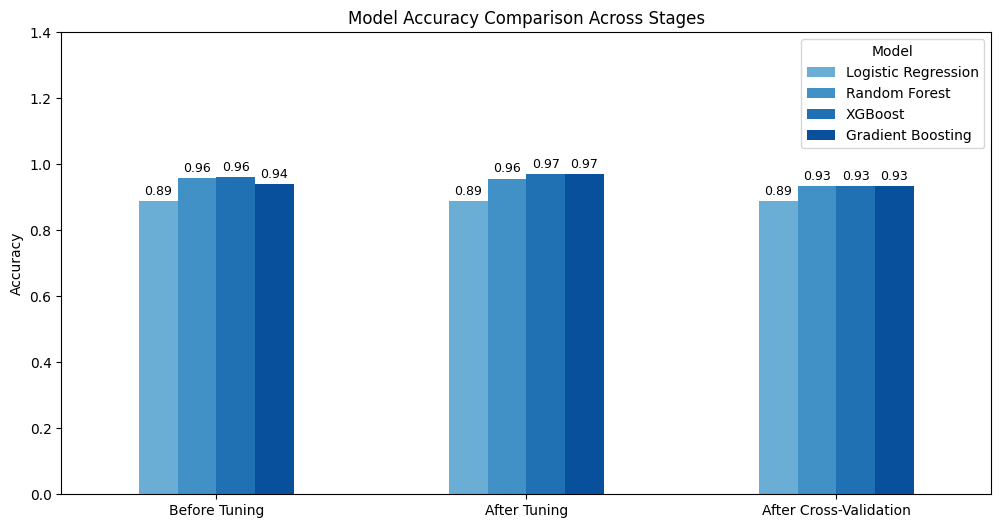

In [ ]:
#Plotting model accuracies to visually assess and compare the performance of all four models.

colors = plt.cm.Blues(np.linspace(0.5, 1.0, len(metrics)))
accuracy_df.plot(
    kind="bar",
    figsize=(12, 6),
    color=colors
)

ax = plt.gca()

for bar in ax.patches:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height +0.01,
        f"{height:.2f}",
        ha="center",
        va="bottom",
        fontsize=9
    )

plt.title("Model Accuracy Comparison Across Stages")
plt.ylabel("Accuracy")
plt.ylim(0, 1.4)
plt.xticks(rotation=0)
plt.legend(title="Model", loc="upper right")
plt.show()

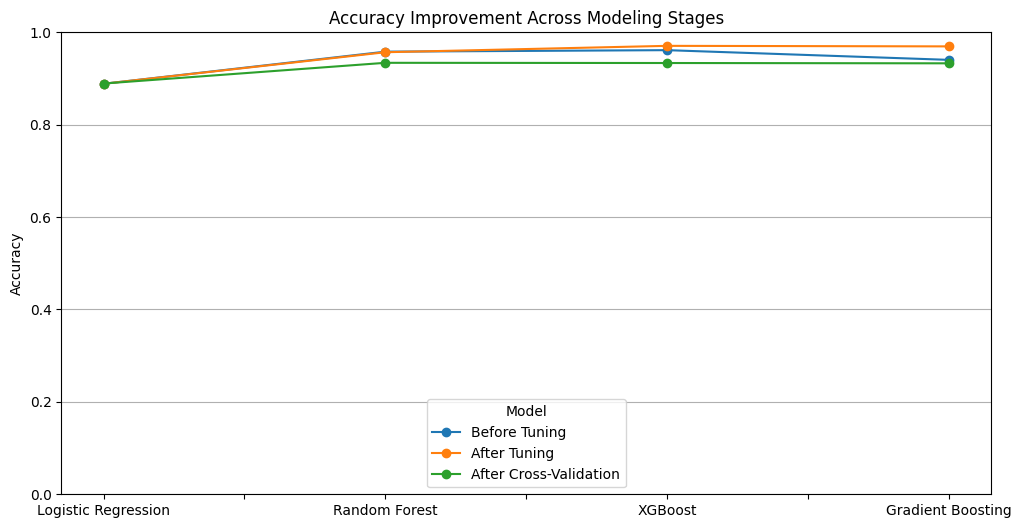

In [701]:
accuracy_df.T.plot(
    marker="o",
    figsize=(12, 6)
)

plt.title("Accuracy Improvement Across Modeling Stages")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.grid(axis="y")
plt.legend(title="Model", loc="lower center")
plt.show()

The baseline models establish an initial performance benchmark. After hyperparameter tuning, all models show improved accuracy, with XGBoost achieving the highest gains. Cross-validation results confirm that the tuned models generalize well, with only minor variance, indicating robust performance.

# Project Summary:
In this project, we developed a machine learning pipeline to predict a customer’s Credit Mix category using financial and behavioral data. The objective was not only to build accurate predictive models, but also to generate actionable insights that could support better credit risk assessment and decision-making.

The workflow began with data cleaning and preprocessing, where we addressed issues such as inconsistent data types, missing values, and noisy categorical and numerical features. We converted numeric columns safely using pandas, handled missing values using group-based median imputation for income-related variables, and standardized categorical fields by trimming unwanted characters and spaces to ensure consistency.

# Modeling approach:
We trained and evaluated multiple classification models to compare performance across different learning paradigms:

Logistic Regression was used as a baseline model due to its simplicity and interpretability.

Random Forest captured non-linear relationships and feature interactions.

XGBoost was implemented as a high-performance boosting model optimized for tabular data.

Gradient Boosting was added to further validate ensemble-based performance.

Hyperparameter tuning was performed using RandomizedSearchCV, with macro and weighted F1-score as the primary optimization metrics to properly handle class imbalance. Models were retrained using the best parameters and evaluated on a hold-out test set.

# Challanges Faced:
Several challenges were encountered during the project:

## Data quality issues

Numeric columns stored as strings caused conversion errors.

Missing values in key financial attributes required careful imputation strategies.

## Class imbalance

Certain credit categories were under-represented, which initially biased the models toward majority classes.

This required the use of class weighting, SMOTE, and weighted evaluation metrics.



# Result Summary:
Across all models:

Logistic Regression provided a strong baseline but struggled with complex patterns.

Random Forest improved overall performance by capturing non-linear relationships.

Gradient Boosting offered competitive results but required careful tuning.

XGBoost consistently achieved the best performance across weighted F1-score and multiclass ROC-AUC metrics.

XGBoost emerged as the final selected model, balancing performance, robustness, and scalability.

# Key Takeways:
Data preprocessing and feature consistency have a significant impact on model performance.

Accuracy alone is insufficient for imbalanced multiclass problems; F1-score and ROC-AUC provide better insight.

Ensemble models, particularly boosting techniques, are highly effective for credit risk prediction.

Explainability tools such as feature importance and SHAP are essential for translating ML output into business-ready insights.

# Recomendations:
Use the trained model as a decision-support tool, not a fully automated system.

Combine predictions with business rules for high-risk credit decisions.

Periodically retrain the model to account for changes in customer behavior.

Extend the solution by deploying it as a REST API or integrating results into a Power BI dashboard for stakeholders.

# Conclusion:
This project successfully demonstrated an end-to-end machine learning workflow for credit classification, from data preparation to advanced model evaluation and interpretation. The results highlight the importance of thoughtful preprocessing, appropriate metric selection, and ensemble modeling techniques in solving real-world financial prediction problems. The final model provides both strong predictive performance and actionable insights that can meaningfully support credit risk management.